# This is a minima example to export Networkx object into igraph
#### and saves it into .ml file

In [4]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.patches as mpatches
from scipy import stats
import pylab as pyl

In [5]:
myroot = "~/BulkAnalysis_plusNetwork/natmiOut/"

print(os.getcwd())
natmiVizOut = "OldD2/Network_exp_0_spe_0_det_0.6_top_0_signal_lrc2p_weight_mean/"
tb = pd.read_csv(f'{myroot}{natmiVizOut}Edges.csv',sep=",", header=0)
tb.head()

/home/johanna/BulkAnalysis_plusNetwork/graphmodeling


,Sending cluster,Ligand symbol,Receptor symbol,Target cluster,Ligand detection rate,Ligand average expression value,Ligand derived specificity of average expression value,Receptor detection rate,Receptor average expression value,Receptor derived specificity of average expression value,Edge average expression weight,Edge average expression derived specificity
0,ECs,Agt,Mas1,FAPs,1.0,0.257198,0.196986,1.0,0.441391,0.184090,0.113525,0.036263
1,ECs,Agt,Mas1,Neutro,1.0,0.257198,0.196986,1.0,0.643158,0.268240,0.165419,0.052840
2,ECs,Agt,Mas1,sCs,1.0,0.257198,0.196986,1.0,0.778765,0.324798,0.200297,0.063981
3,FAPs,Agt,Mas1,FAPs,1.0,0.807212,0.618239,1.0,0.441391,0.184090,0.356296,0.113811
4,FAPs,Agt,Mas1,Neutro,1.0,0.807212,0.618239,1.0,0.643158,0.268240,0.519164,0.165836


In [40]:
# target directory, to save files
outdir =  "~/BulkAnalysis_plusNetwork/graphobs/"

In [6]:
# make UNIQUE the ligand and receptor names by combining celltype alongside
tb['uniq_Ligand_symbol'] = tb['Ligand symbol'] + '_' + tb['Sending cluster']
tb['uniq_Receptor_symbol'] = tb['Receptor symbol'] + '_' + tb['Target cluster']

In [7]:
( max(tb['Ligand average expression value']), max(tb['Receptor average expression value']) )

(4466.833414666667, 2986.508748333333)

In [8]:
np.log10(min(tb['Edge average expression derived specificity']))

-7.615993833841557

(array([2.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 1.500e+01,
        2.100e+01, 3.600e+01, 7.200e+01, 8.600e+01, 1.310e+02, 1.820e+02,
        2.950e+02, 3.870e+02, 5.020e+02, 7.140e+02, 8.650e+02, 1.049e+03,
        1.298e+03, 1.564e+03, 1.973e+03, 2.370e+03, 2.730e+03, 2.999e+03,
        3.020e+03, 2.682e+03, 2.029e+03, 1.221e+03, 3.750e+02, 9.600e+01]),
 array([-7.61599383, -7.36212737, -7.10826091, -6.85439445, -6.60052799,
        -6.34666153, -6.09279507, -5.83892861, -5.58506214, -5.33119568,
        -5.07732922, -4.82346276, -4.5695963 , -4.31572984, -4.06186338,
        -3.80799692, -3.55413046, -3.30026399, -3.04639753, -2.79253107,
        -2.53866461, -2.28479815, -2.03093169, -1.77706523, -1.52319877,
        -1.26933231, -1.01546584, -0.76159938, -0.50773292, -0.25386646,
         0.        ]),
 <BarContainer object of 30 artists>)

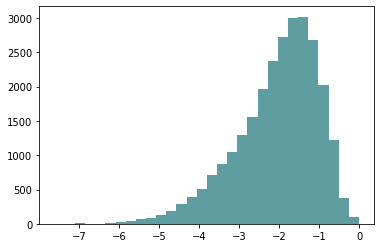

In [9]:
# visualize 'Ligand derived specificity of average expression value'
# and set cutoff

plt.hist(np.log10(np.array(tb['Edge average expression derived specificity'])), bins= 30, color="cadetblue")

### Testing filtering parameters

(array([5493., 3239., 2367., 2029., 1491., 1798., 1244., 1091., 1005.,
         838.,  517.,  665.,  657.,  422.,  715.,  387.,  350.,  376.,
         317.,  164.,  105.,  134.,  200.,  135.,  156.,   91.,  157.,
          96.,  140.,  346.]),
 array([1.41035236e-04, 3.34696674e-02, 6.67982996e-02, 1.00126932e-01,
        1.33455564e-01, 1.66784196e-01, 2.00112828e-01, 2.33441460e-01,
        2.66770093e-01, 3.00098725e-01, 3.33427357e-01, 3.66755989e-01,
        4.00084621e-01, 4.33413253e-01, 4.66741885e-01, 5.00070518e-01,
        5.33399150e-01, 5.66727782e-01, 6.00056414e-01, 6.33385046e-01,
        6.66713678e-01, 7.00042311e-01, 7.33370943e-01, 7.66699575e-01,
        8.00028207e-01, 8.33356839e-01, 8.66685471e-01, 9.00014104e-01,
        9.33342736e-01, 9.66671368e-01, 1.00000000e+00]),
 <BarContainer object of 30 artists>)

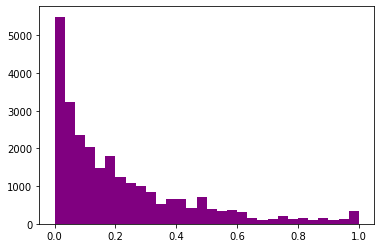

In [10]:
plt.hist(tb['Ligand derived specificity of average expression value'], bins=30, color='purple')

In [11]:
tb_fi = tb[tb['Ligand derived specificity of average expression value'] >= 0.3] 

In [12]:
tb_fi.shape

(6993, 14)

In [13]:
tb_fi = tb_fi[tb_fi['Receptor derived specificity of average expression value'] >= 0.3] 

In [14]:
tb_fi.shape

(1800, 14)

In [15]:
log10cutoff = -1

In [16]:
# retain edges only having log10'Edge average expression derived specificity' superior to cutoff

In [17]:
tb_fi['log10edge_derived_specif'] = np.log10(tb_fi['Edge average expression derived specificity'])

In [18]:
tb_fi = tb_fi[tb_fi["log10edge_derived_specif"] >= log10cutoff ]

In [19]:
tb_fi.shape

(1786, 15)

<div class="alert alert-block alert-warning">
<b>Note:</b>  cutoff on edges did not filter anything, filter on specificity on nodes was enough
</div>

(array([ 32.,  41.,  63.,  64.,  98.,  90., 102., 109., 123., 109., 107.,
        112.,  96., 107.,  94.,  80.,  74.,  46.,  35.,  42.,  36.,  22.,
         22.,  18.,  15.,  17.,  17.,   2.,   7.,   6.]),
 array([-0.99604299, -0.96284156, -0.92964013, -0.89643869, -0.86323726,
        -0.83003583, -0.7968344 , -0.76363296, -0.73043153, -0.6972301 ,
        -0.66402866, -0.63082723, -0.5976258 , -0.56442436, -0.53122293,
        -0.4980215 , -0.46482006, -0.43161863, -0.3984172 , -0.36521576,
        -0.33201433, -0.2988129 , -0.26561147, -0.23241003, -0.1992086 ,
        -0.16600717, -0.13280573, -0.0996043 , -0.06640287, -0.03320143,
         0.        ]),
 <BarContainer object of 30 artists>)

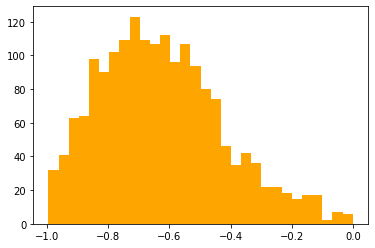

In [20]:
plt.hist(np.log10(np.array(tb_fi['Edge average expression derived specificity'])), bins= 30, color="orange")

In [21]:
celltycolors = {'FAPs':'#5F9EA0' , 'sCs': '#DFC27D' , 'M1': '#13306db2', 
                   'M2': '#E66101', 'Neutro': '#73D055FF', 'ECs': '#b8627db2'}

In [22]:
# make graph: 
Go2 = nx.DiGraph()
for index,row in tb_fi.iterrows():
    nodefrom = row['uniq_Ligand_symbol']
    nodeto = row['uniq_Receptor_symbol']
    celltypefrom = row['Sending cluster']
    celltypeto = row['Target cluster']
    Go2.add_node(nodefrom,
                nodetype = 'sender',
                celltype = celltypefrom,
                genesym = row['Ligand symbol'],
                color = celltycolors[celltypefrom],
                averagexp = row['Ligand average expression value'])
    Go2.add_node(nodeto,
                nodetype = 'receiver',
                celltype = celltypeto, 
                genesym = row['Receptor symbol'],
                color = celltycolors[celltypeto],
                averagexp = row['Receptor average expression value'])
    Go2.add_edge(nodefrom,nodeto, origtype = nodefrom,
                ecolor = celltycolors[celltypefrom],
                weight = row['Edge average expression derived specificity'])  ## NEW !!
    ### pay attention: weight has been changed to specificity !!!!

In [23]:
nodes = Go2.nodes()

In [24]:
len(nodes)

988

In [25]:
edges = Go2.edges()
len(edges)

1786

In [26]:
# transform into undirected graph to extract connected components 
uG = nx.Graph(Go2)

In [27]:
maxconncomp = sorted(nx.connected_components(uG), key=len, reverse=True)

In [28]:
for i in range(10):
    print(len(maxconncomp[i]))

710
19
10
9
8
7
6
6
6
6


In [29]:
print(type(maxconncomp[4]))
    
    

<class 'set'>


## take minimal graph example to transfer into igraph object

In [30]:
minigraph = Go2.subgraph(maxconncomp[2])  # taking the third one, is small only 10 vertices

In [31]:
minigraph.edges()

OutEdgeView([('Ptprc_M1', 'Cd22_M1'), ('Ptprc_M1', 'Cd22_M2'), ('Ptprc_M1', 'Mrc1_M1'), ('Ptprc_M1', 'Mrc1_M2'), ('Cd22_M1', 'Ptprc_M1'), ('Cd22_M1', 'Ptprc_M2'), ('Cd22_M2', 'Ptprc_M1'), ('Cd22_M2', 'Ptprc_M2'), ('Lgals1_FAPs', 'Ptprc_M1'), ('Lgals1_FAPs', 'Ptprc_M2'), ('Lgals1_FAPs', 'Cd69_M1'), ('Lgals1_FAPs', 'Cd69_M2'), ('Ptprc_M2', 'Cd22_M1'), ('Ptprc_M2', 'Cd22_M2'), ('Ptprc_M2', 'Mrc1_M1'), ('Ptprc_M2', 'Mrc1_M2'), ('Myl9_sCs', 'Cd69_M1'), ('Myl9_sCs', 'Cd69_M2'), ('Mrc1_M2', 'Ptprc_M1'), ('Mrc1_M2', 'Ptprc_M2'), ('Mrc1_M1', 'Ptprc_M1'), ('Mrc1_M1', 'Ptprc_M2')])

In [32]:
import igraph as ig

In [33]:
mini_igr = ig.Graph.from_networkx(minigraph)

In [34]:
mini_igr

In [35]:
for ele in mini_igr.vs:
    print(ele)
# igraph.Vertex(<igraph.Graph object at 0x7f917883b5e0>, 0, 
# {'_nx_name': 'Cd22_M2', 'nodetype': 'sender', 'celltype': 'M2',
#'genesym': 'Cd22', 'color': '#E66101', 'averagexp': 8.91760664792547})

igraph.Vertex(<igraph.Graph object at 0x7f16528fa400>, 0, {'_nx_name': 'Ptprc_M1', 'nodetype': 'receiver', 'celltype': 'M1', 'genesym': 'Ptprc', 'color': '#13306db2', 'averagexp': 236.563113})
igraph.Vertex(<igraph.Graph object at 0x7f16528fa400>, 1, {'_nx_name': 'Cd22_M1', 'nodetype': 'sender', 'celltype': 'M1', 'genesym': 'Cd22', 'color': '#13306db2', 'averagexp': 6.090704})
igraph.Vertex(<igraph.Graph object at 0x7f16528fa400>, 2, {'_nx_name': 'Cd22_M2', 'nodetype': 'sender', 'celltype': 'M2', 'genesym': 'Cd22', 'color': '#E66101', 'averagexp': 9.579525333333336})
igraph.Vertex(<igraph.Graph object at 0x7f16528fa400>, 3, {'_nx_name': 'Cd69_M2', 'nodetype': 'receiver', 'celltype': 'M2', 'genesym': 'Cd69', 'color': '#E66101', 'averagexp': 18.75506266666667})
igraph.Vertex(<igraph.Graph object at 0x7f16528fa400>, 4, {'_nx_name': 'Lgals1_FAPs', 'nodetype': 'sender', 'celltype': 'FAPs', 'genesym': 'Lgals1', 'color': '#5F9EA0', 'averagexp': 258.83589166666667})
igraph.Vertex(<igraph.Graph

In [36]:
for edge in mini_igr.es:
    print(edge)

igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 0, {'origtype': 'Ptprc_M1', 'ecolor': '#13306db2', 'weight': 0.1593938855116515})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 1, {'origtype': 'Ptprc_M1', 'ecolor': '#13306db2', 'weight': 0.2506964325039107})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 2, {'origtype': 'Ptprc_M1', 'ecolor': '#13306db2', 'weight': 0.2140773959844077})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 3, {'origtype': 'Ptprc_M1', 'ecolor': '#13306db2', 'weight': 0.1955793491241396})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 4, {'origtype': 'Cd22_M1', 'ecolor': '#13306db2', 'weight': 0.1593938855116515})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 5, {'origtype': 'Cd22_M1', 'ecolor': '#13306db2', 'weight': 0.22596567467296697})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 6, {'origtype': 'Cd22_M2', 'ecolor': '#E66101', 'weight': 0.2506964325039107})
igraph.Edge(<igraph.Graph object at 0x7f16528fa400>, 7, {'o

In [37]:
#layout = mini_igr.layout()
#ig.plot(mini_igr, layout=layout)  ## error: plotting not available

In [38]:
#save to file
mini_igr.write_graphml("myminigraph.ml")

In [39]:
# now try Shiny R app with that object !!!